# Importing Libraries

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

# Loading the Dataset

In [2]:
x_train = np.loadtxt("Y:\\02) Study Academics\\05) BE (SEM-7)\\DL\\Assignment-03\\Animal_Data\\input.csv",delimiter=",")
y_train = np.loadtxt('Y:\\02) Study Academics\\05) BE (SEM-7)\\DL\\Assignment-03\\Animal_Data\\labels.csv', delimiter =',')

x_test = np.loadtxt('Y:\\02) Study Academics\\05) BE (SEM-7)\\DL\\Assignment-03\\Animal_Data\\input_test.csv', delimiter =',')
y_test = np.loadtxt('Y:\\02) Study Academics\\05) BE (SEM-7)\\DL\\Assignment-03\\Animal_Data\\labels_test.csv', delimiter =',')

In [3]:
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [4]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)


Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


# Normalizing and Displaying 

In [5]:
x_train = x_train/255
x_test = x_test/255

x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# Displaying random image from dataset 

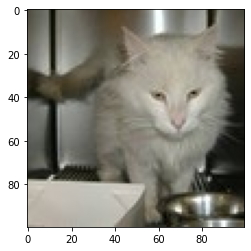

In [6]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0,len(x_train))

plt.imshow(x_train[idx,:])
plt.show()

# Model Building

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [8]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [10]:
H = model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 6s 199ms/step - loss: 0.4134 - accuracy: 0.8225
Epoch 2/10
32/32 [==============================] - 6s 200ms/step - loss: 0.3368 - accuracy: 0.8625
Epoch 3/10
32/32 [==============================] - 6s 199ms/step - loss: 0.2828 - accuracy: 0.8870
Epoch 4/10
32/32 [==============================] - 6s 200ms/step - loss: 0.2311 - accuracy: 0.9175
Epoch 5/10
32/32 [==============================] - 7s 203ms/step - loss: 0.2056 - accuracy: 0.9240
Epoch 6/10
32/32 [==============================] - 8s 235ms/step - loss: 0.1514 - accuracy: 0.9490
Epoch 7/10
32/32 [==============================] - 7s 233ms/step - loss: 0.1032 - accuracy: 0.9730
Epoch 8/10
32/32 [==============================] - 8s 240ms/step - loss: 0.0779 - accuracy: 0.9825
Epoch 9/10
32/32 [==============================] - 8s 246ms/step - loss: 0.0647 - accuracy: 0.9840
Epoch 10/10
32/32 [==============================] - 7s 231ms/step - loss: 0.0446 - accuracy: 0.9905

# Evaluation

In [11]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 37ms/step - loss: 1.2313 - accuracy: 0.6725


[1.2313315868377686, 0.6725000143051147]

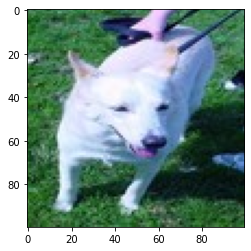

1/1 [==============================] - 0s 127ms/step
It is a dog


In [12]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("It is a",pred)

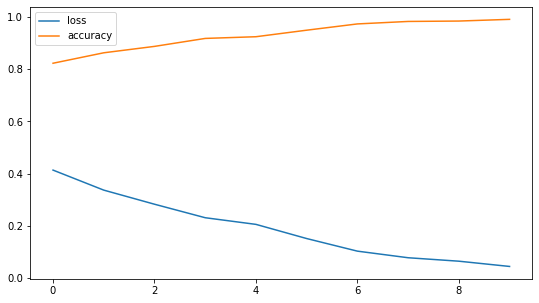

In [13]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()